In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Input
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.callbacks import ModelCheckpoint

In [2]:
image_generator = ImageDataGenerator(
    rescale=1./255.,
    shear_range=0.1,
    zoom_range=0.3,
)
image_generator_test = ImageDataGenerator(
    rescale=1./255.
)

In [3]:
train_data = image_generator.flow_from_directory(
    'data',
    target_size=(500, 500),
    color_mode='grayscale',
    class_mode='binary',
    batch_size=50
)

Found 550 images belonging to 2 classes.


In [4]:
test_data = image_generator_test.flow_from_directory(
    'test_data',
    target_size=(500, 500),
    color_mode='grayscale',
    class_mode='binary',
    batch_size=50
)

Found 74 images belonging to 2 classes.


In [5]:
model = Sequential()
model.add(Input(shape=(500, 500, 1)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [6]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

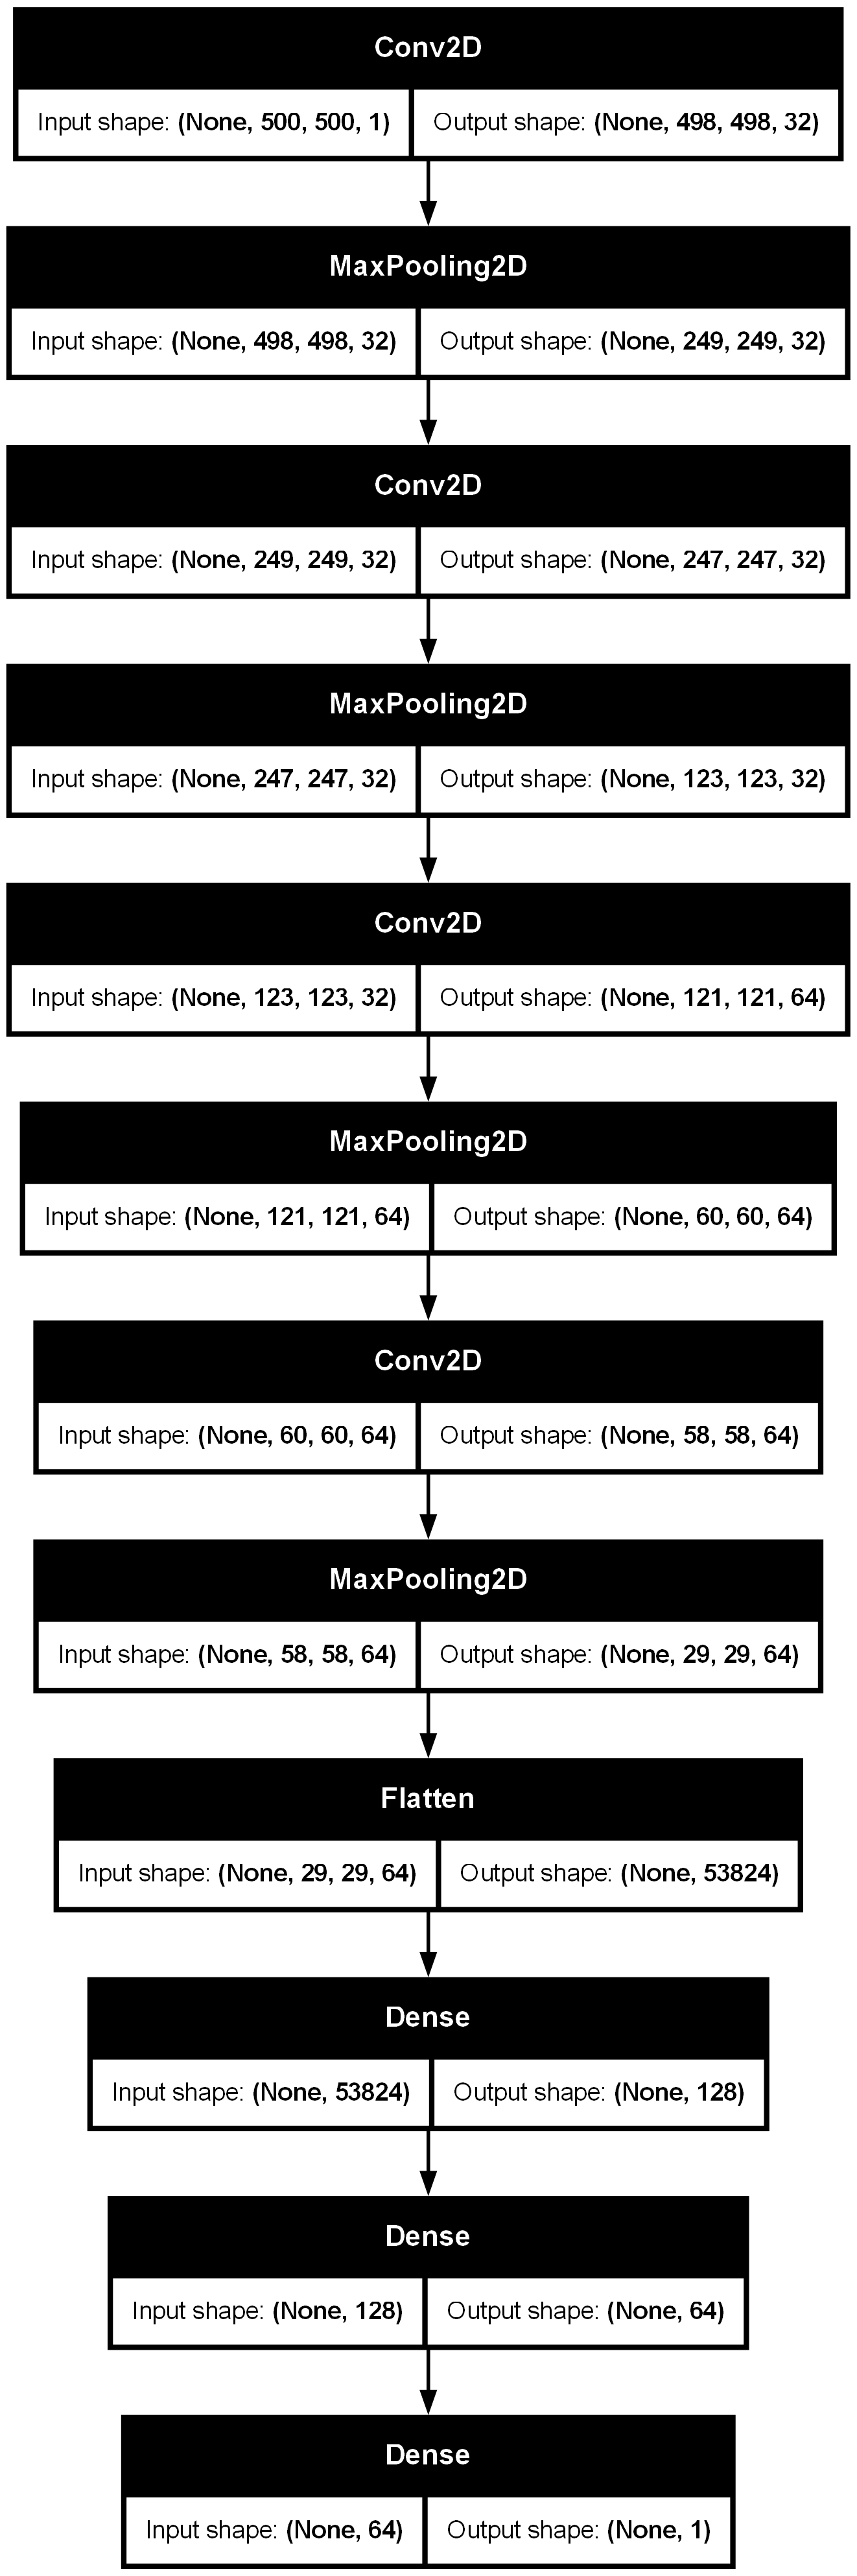

In [7]:
plot_model(model, show_shapes=True, show_layer_names=False)

In [11]:
train_data.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [8]:
compute_class_weight(class_weight='balanced', classes=np.unique(train_data.classes), y=train_data.classes)

array([1.39593909, 0.77903683])

In [9]:
weights = compute_class_weight(class_weight='balanced', classes=np.unique(train_data.classes), y=train_data.classes)

In [10]:
class_weights = dict(zip(np.unique(train_data.classes), weights))

In [11]:
class_weights

{np.int32(0): np.float64(1.3959390862944163),
 np.int32(1): np.float64(0.7790368271954674)}

In [12]:
es = EarlyStopping(monitor='val_loss', mode='min', patience=3)
rlrop = ReduceLROnPlateau(monitor='val_loss', patience=2, factor=0.2, min_lr=0.001)

In [ ]:
mch = ModelCheckpoint('chestxray.keras', monitor='val_loss', mode='min', save_best_only=True)

In [14]:
history = model.fit(train_data, steps_per_epoch=len(train_data), epochs=30, validation_data=test_data, validation_steps=len(train_data), callbacks=[es, rlrop, mch], class_weight=class_weights)

c:\Users\salim\Desktop\ProgramingProjects\DataMining\mlenv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5259 - loss: 0.7137

c:\Users\salim\Desktop\ProgramingProjects\DataMining\mlenv\Lib\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


11/11 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.5073 - loss: 0.6988 - val_accuracy: 0.5000 - val_loss: 0.6731 - learning_rate: 0.0010
Epoch 2/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.6527 - loss: 0.6314 - val_accuracy: 0.5000 - val_loss: 0.7519 - learning_rate: 0.0010
Epoch 3/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5681 - loss: 0.6438

11/11 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.6145 - loss: 0.6337 - val_accuracy: 0.8378 - val_loss: 0.5312 - learning_rate: 0.0010
Epoch 4/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7635 - loss: 0.5619

11/11 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.7327 - loss: 0.5614 - val_accuracy: 0.7838 - val_loss: 0.4846 - learning_rate: 0.0010
Epoch 5/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7708 - loss: 0.4979

11/11 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.7600 - loss: 0.5019 - val_accuracy: 0.8243 - val_loss: 0.4452 - learning_rate: 0.0010
Epoch 6/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8112 - loss: 0.4506

11/11 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.8327 - loss: 0.3965 - val_accuracy: 0.8108 - val_loss: 0.3834 - learning_rate: 0.0010
Epoch 7/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.8636 - loss: 0.3352 - val_accuracy: 0.7703 - val_loss: 0.5071 - learning_rate: 0.0010
Epoch 8/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.8455 - loss: 0.3507 - val_accuracy: 0.6622 - val_loss: 0.8029 - learning_rate: 0.0010
Epoch 9/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.8055 - loss: 0.3905 - val_accuracy: 0.7568 - val_loss: 0.4360 - learning_rate: 0.0010


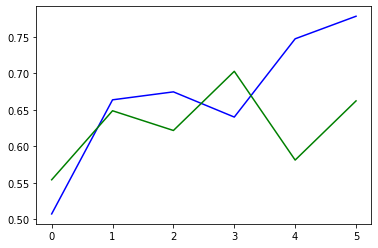

In [16]:
plt.plot(history.history['accuracy'], color='blue')
plt.plot(history.history['val_accuracy'], color='green')

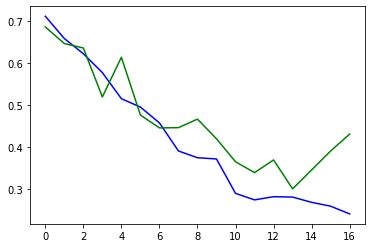

In [15]:
plt.plot(history.history['loss'], color='blue')
plt.plot(history.history['val_loss'], color='green')